In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('data/HousingData.csv')

In [3]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [5]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [6]:
x = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

In [7]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [8]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
print(model.coef_)
print(model.intercept_)

[2.15240432e+01 1.66581043e+05 1.20888302e+05 1.81814199e+03
 1.53104279e+01]
-2644356.212261455


In [10]:
pd.DataFrame(model.coef_, x.columns, columns = ['Coeff'])

,Coeff
Avg. Area Income,21.524043
Avg. Area House Age,166581.042554
Avg. Area Number of Rooms,120888.301623
Avg. Area Number of Bedrooms,1818.141988
Area Population,15.310428


In [16]:
y_pred = model.predict(x_test)

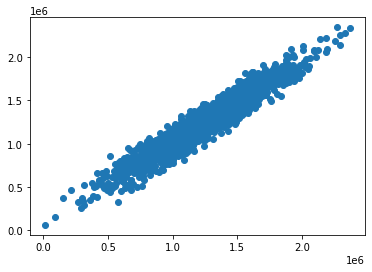

In [17]:
plt.scatter(y_test, y_pred)

(array([  2.,  20.,  91., 209., 330., 321., 281., 152.,  76.,  18.]),
 array([-336069.25816578, -273876.61306951, -211683.96797324,
        -149491.32287697,  -87298.6777807 ,  -25106.03268443,
          37086.61241184,   99279.25750811,  161471.90260438,
         223664.54770065,  285857.19279692]),
 <a list of 10 Patch objects>)

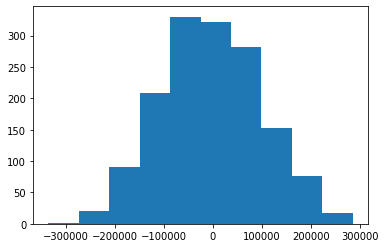

In [18]:
plt.hist(y_test - y_pred)

In [19]:
from sklearn import metrics

metrics.mean_absolute_error(y_test, y_pred)

83566.74405592227

In [20]:
metrics.mean_squared_error(y_test, y_pred)

10531368717.071884

In [21]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

102622.45717713001